C:\Users\Kunal\AppData\Local\Temp\ipykernel_16144\4201010280.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_series['sales'].fillna(0, inplace=True)


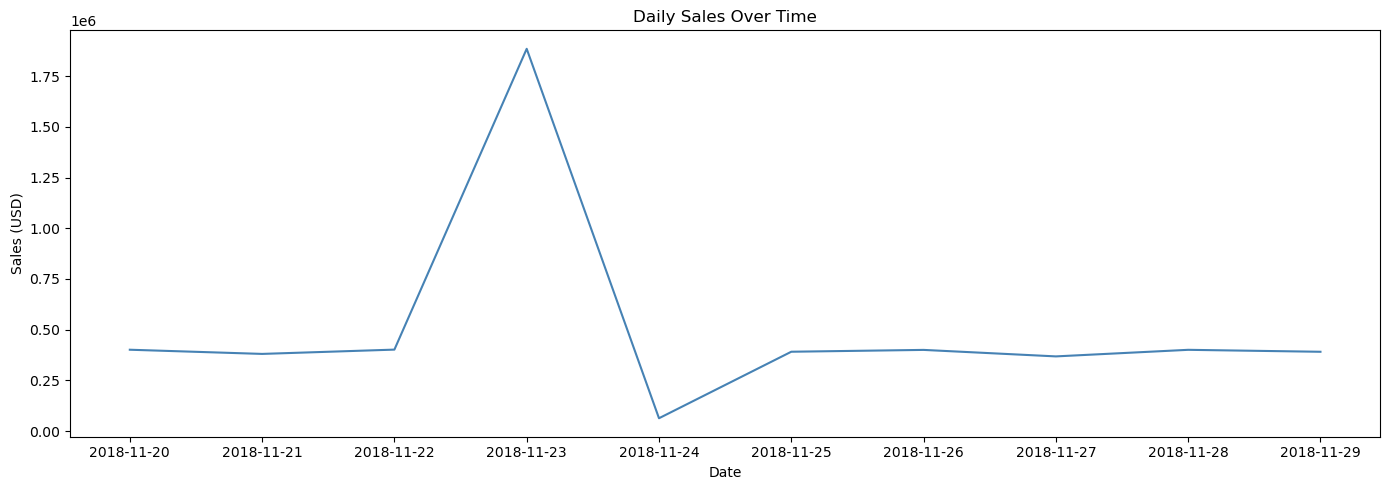

✅ Time series data is prepared and saved as 'processed_time_series_sales.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# 1️⃣ Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Optional: Rename columns for convenience
df.rename(columns={'value [USD]': 'sales'}, inplace=True)

# 2️⃣ Aggregate daily sales
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# 3️⃣ Create full date range to identify missing dates
full_dates = pd.date_range(start=daily_sales['date'].min(), end=daily_sales['date'].max())
full_df = pd.DataFrame({'date': full_dates})

# Merge with daily sales to fill missing days with 0
time_series = pd.merge(full_df, daily_sales, on='date', how='left')
time_series['sales'].fillna(0, inplace=True)

# 4️⃣ Set 'date' as index and sort chronologically
time_series.set_index('date', inplace=True)
time_series.sort_index(inplace=True)

# 5️⃣ Optional: Extract features for deeper analysis
time_series['month'] = time_series.index.month
time_series['weekday'] = time_series.index.dayofweek
time_series['week'] = time_series.index.isocalendar().week

# 6️⃣ Plot to check trend and seasonality
plt.figure(figsize=(14, 5))
plt.plot(time_series['sales'], color='steelblue')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.show()

# 7️⃣ Save cleaned time series dataset
time_series.to_csv("processed_time_series_sales.csv")

print("✅ Time series data is prepared and saved as 'processed_time_series_sales.csv'")
